In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\benja\Ironhack\Week 4\project\sql-database\sources\SECONDARY - 8- air-passengers-carried.csv")
df

,Entity,Code,Year,"Air transport, passengers carried"
0,Afghanistan,AFG,1970,84700.00
1,Afghanistan,AFG,1971,97400.00
2,Afghanistan,AFG,1972,104900.00
3,Afghanistan,AFG,1973,96600.00
4,Afghanistan,AFG,1974,96100.00
...,...,...,...,...
8137,Zimbabwe,ZWE,2015,370165.00
8138,Zimbabwe,ZWE,2016,378803.00
8139,Zimbabwe,ZWE,2017,282539.00
8140,Zimbabwe,ZWE,2018,282539.00


In [2]:
df = df.rename(columns={'Air transport, passengers carried': 'passengers_carried', 'Entity': 'country'})

In [3]:
df.columns = df.columns.str.lower()

In [4]:
df.isna().sum()

country                 0
code                  622
year                    0
passengers_carried      0
dtype: int64

In [5]:
df_2019 = df[df['year'] == 2019]
df_2019

,country,code,year,passengers_carried
40,Afghanistan,AFG,2019,1.066747e+06
66,Albania,ALB,2019,3.077410e+05
117,Algeria,DZA,2019,6.752002e+06
167,Angola,AGO,2019,1.436959e+06
207,Antigua and Barbuda,ATG,2019,5.263340e+05
...,...,...,...,...
7850,Vanuatu,VUT,2019,4.668651e+05
7901,Venezuela,VEN,2019,1.516839e+06
7948,Vietnam,VNM,2019,5.322702e+07
7998,World,OWID_WRL,2019,4.557606e+09


In [6]:
df_2019.isna().sum()

country                0
code                  13
year                   0
passengers_carried     0
dtype: int64

In [7]:
df_2019.dropna(subset=['code'], inplace=True)

C:\Users\benja\AppData\Local\Temp\ipykernel_24456\368306096.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019.dropna(subset=['code'], inplace=True)


In [8]:
df_2019.isna().sum()

country               0
code                  0
year                  0
passengers_carried    0
dtype: int64

In [9]:
df_2019.head(5)

,country,code,year,passengers_carried
40,Afghanistan,AFG,2019,1066747.4
66,Albania,ALB,2019,307741.0
117,Algeria,DZA,2019,6752002.0
167,Angola,AGO,2019,1436959.0
207,Antigua and Barbuda,ATG,2019,526334.0


In [10]:
#Filter the DataFrame for the specific year (e.g., 2019)
df_2019 = df_2019[df_2019['year'] == 2019]

#Sort the DataFrame by the 'Air transport, passengers carried' column in descending order
df_2019.sort_values(by='passengers_carried', ascending=False, inplace=True)
df_2019

,country,code,year,passengers_carried
7998,World,OWID_WRL,2019,4.557606e+09
7695,United States,USA,2019,9.267370e+08
1399,China,CHN,2019,6.596291e+08
3336,Ireland,IRL,2019,1.701619e+08
3148,India,IND,2019,1.674991e+08
...,...,...,...,...
8096,Zambia,ZMB,2019,1.750569e+04
4345,Malawi,MWI,2019,7.117000e+03
804,Bosnia and Herzegovina,BIH,2019,5.375000e+03
2186,Estonia,EST,2019,8.570000e+02


In [11]:
df_2019['country'].unique()

array(['World', 'United States', 'China', 'Ireland', 'India',
       'United Kingdom', 'Japan', 'Turkey', 'Germany', 'Russia', 'Brazil',
       'United Arab Emirates', 'Canada', 'South Korea', 'Indonesia',
       'Spain', 'Australia', 'Thailand', 'France', 'Mexico', 'Malaysia',
       'Vietnam', 'Denmark', 'Sweden', 'Norway', 'Philippines', 'Austria',
       'Hong Kong', 'Netherlands', 'Saudi Arabia', 'Singapore', 'Hungary',
       'Colombia', 'Qatar', 'Switzerland', 'Italy', 'South Africa',
       'Portugal', 'Iran', 'Chile', 'Argentina', 'Peru', 'New Zealand',
       'Greece', 'Finland', 'Belgium', 'Egypt', 'Ethiopia', 'Panama',
       'Oman', 'Poland', 'Morocco', 'Kazakhstan', 'Ukraine', 'Pakistan',
       'Kuwait', 'Israel', 'Algeria', 'Nigeria', 'Bahrain', 'Kenya',
       'Bangladesh', 'Romania', 'Sri Lanka', 'Czechia', 'Iraq', 'Latvia',
       'Ecuador', 'Iceland', 'Tunisia', 'Bolivia', 'Myanmar',
       'Uzbekistan', 'Macao', 'Jordan', 'Belarus', 'Lebanon',
       'El Salvador',

In [12]:
entities_to_remove = ['World']
df_2019 = df_2019[~df_2019['country'].isin(entities_to_remove)]
df_2019

,country,code,year,passengers_carried
7695,United States,USA,2019,9.267370e+08
1399,China,CHN,2019,6.596291e+08
3336,Ireland,IRL,2019,1.701619e+08
3148,India,IND,2019,1.674991e+08
7644,United Kingdom,GBR,2019,1.423925e+08
...,...,...,...,...
8096,Zambia,ZMB,2019,1.750569e+04
4345,Malawi,MWI,2019,7.117000e+03
804,Bosnia and Herzegovina,BIH,2019,5.375000e+03
2186,Estonia,EST,2019,8.570000e+02


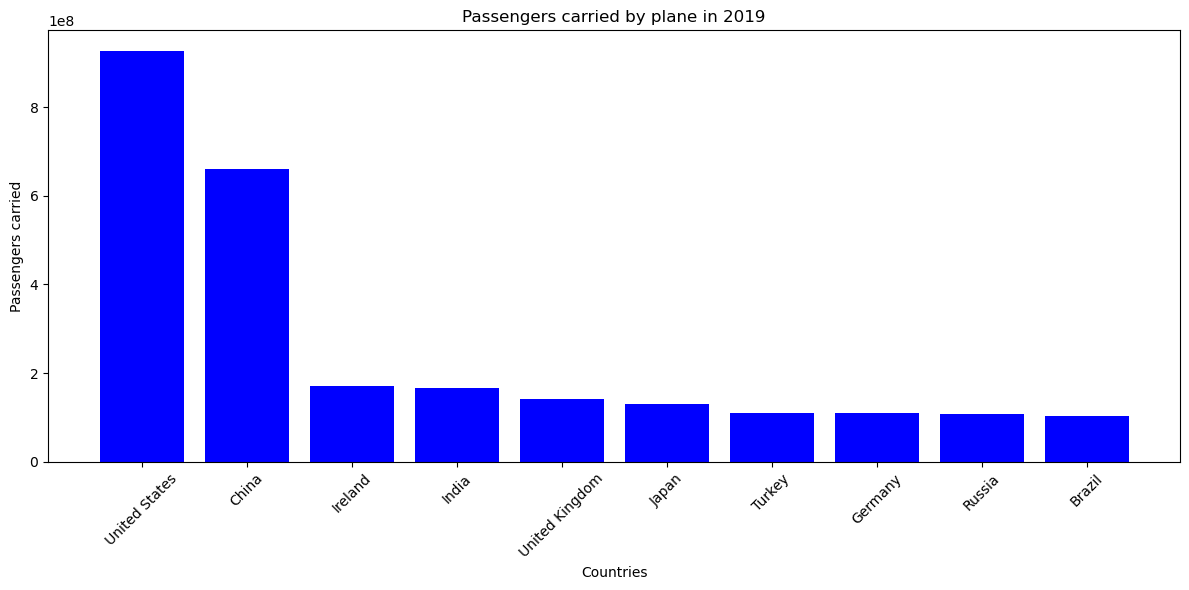

In [13]:
df_2019_top_10 = df_2019.sort_values(by='passengers_carried', ascending=False).head(10)

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(df_2019_top_10['country'], df_2019_top_10['passengers_carried'], color='blue')
plt.xlabel('Countries')
plt.ylabel('Passengers carried')
plt.title('Passengers carried by plane in 2019')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_co2 = pd.read_csv(r"C:\Users\benja\Ironhack\Week 4\project\sql-database\sources\MAIN - 5- monthly-co2-emissions-from-international-and-domestic-flights.csv")
df_co2

,Entity,Code,Day,Monthly CO₂ emissions from domestic aviation,Monthly CO₂ emissions from international aviation
0,Afghanistan,AFG,2019-01-15,2098.05,10805.400
1,Afghanistan,AFG,2019-02-15,2979.15,10430.700
2,Afghanistan,AFG,2019-03-15,1964.36,12223.300
3,Afghanistan,AFG,2019-04-15,3614.57,14301.500
4,Afghanistan,AFG,2019-05-15,3009.41,13695.100
...,...,...,...,...,...
9518,Zimbabwe,ZWE,2020-04-15,NaN,650.102
9519,Zimbabwe,ZWE,2020-05-15,NaN,467.069
9520,Zimbabwe,ZWE,2020-06-15,NaN,445.073
9521,Zimbabwe,ZWE,2020-07-15,NaN,1002.460


In [15]:
df_co2 = df_co2.rename(columns={'Monthly CO₂ emissions from domestic aviation': 'CO2_domestic_aviation'})

In [16]:
df_co2 = df_co2.rename(columns={'Monthly CO₂ emissions from international aviation': 'CO2_international_aviation'})

In [17]:
df_co2 = df_co2.rename(columns={'Entity': 'country'})

In [18]:
df_co2.columns = df_co2.columns.str.lower()

In [19]:
df_co2

,country,code,day,co2_domestic_aviation,co2_international_aviation
0,Afghanistan,AFG,2019-01-15,2098.05,10805.400
1,Afghanistan,AFG,2019-02-15,2979.15,10430.700
2,Afghanistan,AFG,2019-03-15,1964.36,12223.300
3,Afghanistan,AFG,2019-04-15,3614.57,14301.500
4,Afghanistan,AFG,2019-05-15,3009.41,13695.100
...,...,...,...,...,...
9518,Zimbabwe,ZWE,2020-04-15,NaN,650.102
9519,Zimbabwe,ZWE,2020-05-15,NaN,467.069
9520,Zimbabwe,ZWE,2020-06-15,NaN,445.073
9521,Zimbabwe,ZWE,2020-07-15,NaN,1002.460


In [20]:
# Convert 'day' to datetime format
df_co2['day'] = pd.to_datetime(df_co2['day'])

# Create new columns for year and month_day
df_co2['year'] = df_co2['day'].dt.year
df_co2['month_day'] = df_co2['day'].dt.strftime('%m-%d')  # Format to get month and day

# Dropping the original 'day' column (optional)
df_co2 = df_co2.drop(columns=['day'])

In [21]:
df_co2

,country,code,co2_domestic_aviation,co2_international_aviation,year,month_day
0,Afghanistan,AFG,2098.05,10805.400,2019,01-15
1,Afghanistan,AFG,2979.15,10430.700,2019,02-15
2,Afghanistan,AFG,1964.36,12223.300,2019,03-15
3,Afghanistan,AFG,3614.57,14301.500,2019,04-15
4,Afghanistan,AFG,3009.41,13695.100,2019,05-15
...,...,...,...,...,...,...
9518,Zimbabwe,ZWE,NaN,650.102,2020,04-15
9519,Zimbabwe,ZWE,NaN,467.069,2020,05-15
9520,Zimbabwe,ZWE,NaN,445.073,2020,06-15
9521,Zimbabwe,ZWE,NaN,1002.460,2020,07-15


In [22]:
# Create a new column 'total_co2' by summing the two existing columns
df_co2['total_co2'] = df_co2['co2_domestic_aviation'] + df_co2['co2_international_aviation']

In [23]:
df_co2

,country,code,co2_domestic_aviation,co2_international_aviation,year,month_day,total_co2
0,Afghanistan,AFG,2098.05,10805.400,2019,01-15,12903.45
1,Afghanistan,AFG,2979.15,10430.700,2019,02-15,13409.85
2,Afghanistan,AFG,1964.36,12223.300,2019,03-15,14187.66
3,Afghanistan,AFG,3614.57,14301.500,2019,04-15,17916.07
4,Afghanistan,AFG,3009.41,13695.100,2019,05-15,16704.51
...,...,...,...,...,...,...,...
9518,Zimbabwe,ZWE,NaN,650.102,2020,04-15,NaN
9519,Zimbabwe,ZWE,NaN,467.069,2020,05-15,NaN
9520,Zimbabwe,ZWE,NaN,445.073,2020,06-15,NaN
9521,Zimbabwe,ZWE,NaN,1002.460,2020,07-15,NaN


In [24]:
#Filter the DataFrame for the specific year (2019)
df_co2 = df_co2[df_co2['year'] == 2019]
df_co2

,country,code,co2_domestic_aviation,co2_international_aviation,year,month_day,total_co2
0,Afghanistan,AFG,2098.05000,10805.40,2019,01-15,12903.45000
1,Afghanistan,AFG,2979.15000,10430.70,2019,02-15,13409.85000
2,Afghanistan,AFG,1964.36000,12223.30,2019,03-15,14187.66000
3,Afghanistan,AFG,3614.57000,14301.50,2019,04-15,17916.07000
4,Afghanistan,AFG,3009.41000,13695.10,2019,05-15,16704.51000
...,...,...,...,...,...,...,...
9479,Zimbabwe,ZWE,7.41884,8746.68,2019,10-15,8754.09884
9511,Zimbabwe,ZWE,NaN,8226.18,2019,06-15,NaN
9512,Zimbabwe,ZWE,NaN,9470.91,2019,07-15,NaN
9513,Zimbabwe,ZWE,NaN,8102.72,2019,11-15,NaN


In [25]:
#Sort the DataFrame by the 'Air transport, passengers carried' column in descending order
df_co2 = df_co2.sort_values(by='total_co2', ascending=False)
df_co2

,country,code,co2_domestic_aviation,co2_international_aviation,year,month_day,total_co2
9353,World,OWID_WRL,29565016.0,49965336.00,2019,07-15,79530352.0
9354,World,OWID_WRL,29537594.0,49971330.00,2019,08-15,79508924.0
9358,World,OWID_WRL,29287798.0,45451144.00,2019,12-15,74738942.0
9356,World,OWID_WRL,28766098.0,45714096.00,2019,10-15,74480194.0
9352,World,OWID_WRL,27531116.0,46846784.00,2019,06-15,74377900.0
...,...,...,...,...,...,...,...
9442,Zambia,ZMB,NaN,14089.50,2019,11-15,NaN
9511,Zimbabwe,ZWE,NaN,8226.18,2019,06-15,NaN
9512,Zimbabwe,ZWE,NaN,9470.91,2019,07-15,NaN
9513,Zimbabwe,ZWE,NaN,8102.72,2019,11-15,NaN


In [26]:
df_co2['country'].unique()

array(['World', 'Asia', 'North America', 'Europe', 'United States',
       'China', 'United Kingdom', 'South America', 'Japan', 'Oceania',
       'Germany', 'United Arab Emirates', 'Africa', 'France', 'India',
       'Spain', 'Canada', 'Australia', 'Russia', 'Turkey', 'Indonesia',
       'Brazil', 'Thailand', 'South Korea', 'Italy', 'Mexico',
       'Singapore', 'Netherlands', 'Saudi Arabia', 'Qatar', 'Philippines',
       'Malaysia', 'Vietnam', 'Greece', 'South Africa', 'Portugal',
       'Switzerland', 'New Zealand', 'Argentina', 'Colombia', 'Ireland',
       'Israel', 'Chile', 'Belgium', 'Poland', 'Denmark', 'Egypt',
       'Sweden', 'Norway', 'Austria', 'Peru', 'Morocco', 'Finland',
       'Panama', 'Ethiopia', 'Pakistan', 'Dominican Republic', 'Oman',
       'Czechia', 'Iceland', 'Romania', 'Kazakhstan', 'Ukraine', 'Cuba',
       'Bangladesh', 'Cyprus', 'Iran', 'Nigeria', 'Croatia', 'Kenya',
       'Costa Rica', 'Tunisia', 'Bulgaria', 'Hungary', 'Ecuador',
       'Jordan', 'Algeri

In [27]:
entities_to_remove = ['World', 'Asia', 'Europe', 'Africa', 'Oceania', 'North America', 'South America']
df_co2 = df_co2[~df_co2['country'].isin(entities_to_remove)]
df_co2

,country,code,co2_domestic_aviation,co2_international_aviation,year,month_day,total_co2
9047,United States,USA,11784100.0,6753170.00,2019,07-15,18537270.0
9048,United States,USA,11734900.0,6700490.00,2019,08-15,18435390.0
9046,United States,USA,11295800.0,6457200.00,2019,06-15,17753000.0
9052,United States,USA,11396100.0,6223000.00,2019,12-15,17619100.0
9045,United States,USA,11157000.0,6370070.00,2019,05-15,17527070.0
...,...,...,...,...,...,...,...
9442,Zambia,ZMB,NaN,14089.50,2019,11-15,NaN
9511,Zimbabwe,ZWE,NaN,8226.18,2019,06-15,NaN
9512,Zimbabwe,ZWE,NaN,9470.91,2019,07-15,NaN
9513,Zimbabwe,ZWE,NaN,8102.72,2019,11-15,NaN


In [28]:
# Grouping by entity and summing the required columns
df_co2 = df_co2.groupby('country').agg(
    co2_domestic_aviation=('co2_domestic_aviation', 'sum'),
    co2_international_aviation=('co2_international_aviation', 'sum'),
    total_co2=('total_co2', 'sum')
).reset_index()

# Sorting by total_co₂ in descending order
df_co2 = df_co2.sort_values(by='total_co2', ascending=False)
df_co2

,country,co2_domestic_aviation,co2_international_aviation,total_co2
174,United States,1.296879e+08,7.205546e+07,2.017434e+08
33,China,7.825995e+07,3.549031e+07,1.137503e+08
173,United Kingdom,1.283385e+06,3.452379e+07,3.580718e+07
79,Japan,1.072842e+07,1.960267e+07,3.033109e+07
172,United Arab Emirates,2.230515e+03,2.620251e+07,2.620474e+07
...,...,...,...,...
45,Djibouti,0.000000e+00,4.602865e+04,0.000000e+00
154,Sri Lanka,0.000000e+00,1.406966e+06,0.000000e+00
116,Niger,0.000000e+00,9.027983e+04,0.000000e+00
65,Guinea-Bissau,0.000000e+00,1.335124e+04,0.000000e+00


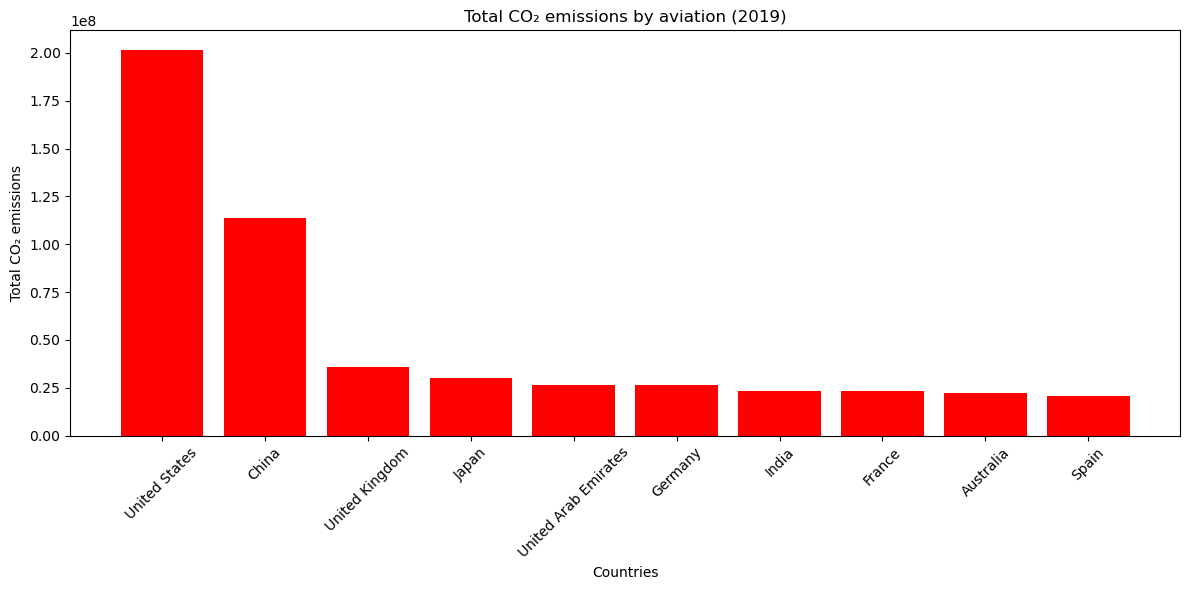

In [29]:
df_co2_top_10 = df_co2.sort_values(by='total_co2', ascending=False).head(10)

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(df_co2_top_10['country'], df_co2_top_10['total_co2'], color='red')
plt.xlabel('Countries')
plt.ylabel('Total CO₂ emissions')
plt.title('Total CO₂ emissions by aviation (2019)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

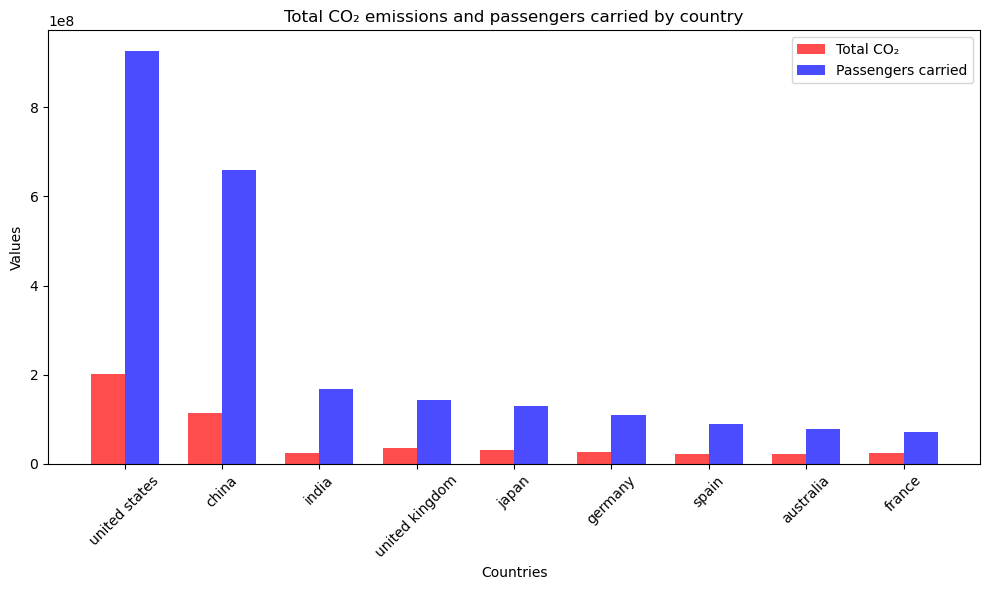

In [30]:
# Define the countries to display (based on countries emiting more CO2)
countries_to_display = ['united states', 'china', 'united kingdom', 'japan', 
                        'united Arab emirates', 'germany', 'india', 'france', 
                        'australia', 'spain']

# Make a copy of the DataFrames and convert country names to lowercase for consistency
df_2019_copy = df_2019.copy()
df_co2_copy = df_co2.copy()

df_2019_copy['country'] = df_2019_copy['country'].str.lower()
df_co2_copy['country'] = df_co2_copy['country'].str.lower()

# Filter both DataFrames to include only the specified countries
df_2019_filtered = df_2019_copy[df_2019_copy['country'].isin(countries_to_display)]
df_co2_filtered = df_co2_copy[df_co2_copy['country'].isin(countries_to_display)]

# Merge the two DataFrames on the 'country' column to ensure proper alignment
merged_df = pd.merge(df_2019_filtered, df_co2_filtered, on='country')

# Set the width of the bars and the position of the bars on the x-axis
bar_width = 0.35
index = np.arange(len(merged_df))

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plot total_co2 bars
bars1 = ax.bar(index, merged_df['total_co2'], bar_width, label='Total CO₂', color='r', alpha=0.7)

# Plot passengers_carried bars next to total_co2
bars2 = ax.bar(index + bar_width, merged_df['passengers_carried'], bar_width, label='Passengers carried', color='b', alpha=0.7)

# Labels and title
ax.set_xlabel('Countries')
ax.set_ylabel('Values')
ax.set_title('Total CO₂ emissions and passengers carried by country')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(merged_df['country'], rotation=45)

# Add legend
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


In [31]:
# Merge the DataFrames on 'country'
merged_df = pd.merge(df_2019, df_co2, on='country', how='inner')
merged_df

,country,code,year,passengers_carried,co2_domestic_aviation,co2_international_aviation,total_co2
0,United States,USA,2019,9.267370e+08,1.296879e+08,72055460.00,2.017434e+08
1,China,CHN,2019,6.596291e+08,7.825995e+07,35490310.00,1.137503e+08
2,Ireland,IRL,2019,1.701619e+08,6.394537e+03,3188634.00,3.195029e+06
3,India,IND,2019,1.674991e+08,1.260445e+07,10856772.00,2.346123e+07
4,United Kingdom,GBR,2019,1.423925e+08,1.283385e+06,34523790.00,3.580718e+07
...,...,...,...,...,...,...,...
147,Syria,SYR,2019,1.845665e+04,1.095840e+02,20758.71,3.667874e+03
148,Zambia,ZMB,2019,1.750569e+04,2.477100e+01,192029.80,3.338647e+04
149,Malawi,MWI,2019,7.117000e+03,2.535702e+03,30589.06,2.197153e+04
150,Bosnia and Herzegovina,BIH,2019,5.375000e+03,9.436330e+00,94372.15,1.400944e+04


In [32]:
merged_df.isna().sum()

country                       0
code                          0
year                          0
passengers_carried            0
co2_domestic_aviation         0
co2_international_aviation    0
total_co2                     0
dtype: int64

In [33]:
# Create a new column 'co2_by_passenger'
merged_df['co2_by_passenger'] = merged_df['total_co2'] / merged_df['passengers_carried']
merged_df

,country,code,year,passengers_carried,co2_domestic_aviation,co2_international_aviation,total_co2,co2_by_passenger
0,United States,USA,2019,9.267370e+08,1.296879e+08,72055460.00,2.017434e+08,0.217692
1,China,CHN,2019,6.596291e+08,7.825995e+07,35490310.00,1.137503e+08,0.172446
2,Ireland,IRL,2019,1.701619e+08,6.394537e+03,3188634.00,3.195029e+06,0.018776
3,India,IND,2019,1.674991e+08,1.260445e+07,10856772.00,2.346123e+07,0.140068
4,United Kingdom,GBR,2019,1.423925e+08,1.283385e+06,34523790.00,3.580718e+07,0.251468
...,...,...,...,...,...,...,...,...
147,Syria,SYR,2019,1.845665e+04,1.095840e+02,20758.71,3.667874e+03,0.198729
148,Zambia,ZMB,2019,1.750569e+04,2.477100e+01,192029.80,3.338647e+04,1.907178
149,Malawi,MWI,2019,7.117000e+03,2.535702e+03,30589.06,2.197153e+04,3.087190
150,Bosnia and Herzegovina,BIH,2019,5.375000e+03,9.436330e+00,94372.15,1.400944e+04,2.606407


In [34]:
merged_df = merged_df.sort_values(by='co2_by_passenger', ascending=False)
merged_df

,country,code,year,passengers_carried,co2_domestic_aviation,co2_international_aviation,total_co2,co2_by_passenger
133,Dominican Republic,DOM,2019,113752.0,3433.32600,1886331.000,1.889764e+06,16.613021
142,Lithuania,LTU,2019,40944.0,128.08962,339568.900,3.396970e+05,8.296624
149,Malawi,MWI,2019,7117.0,2535.70200,30589.060,2.197153e+04,3.087190
135,Guatemala,GTM,2019,107350.0,8286.76700,276321.300,2.846081e+05,2.651216
150,Bosnia and Herzegovina,BIH,2019,5375.0,9.43633,94372.150,1.400944e+04,2.606407
...,...,...,...,...,...,...,...,...
61,Sri Lanka,LKA,2019,5582446.0,0.00000,1406966.000,0.000000e+00,0.000000
134,North Korea,PRK,2019,109095.0,0.00000,4610.843,0.000000e+00,0.000000
73,Lebanon,LBN,2019,3164358.0,0.00000,938492.000,0.000000e+00,0.000000
132,Burkina Faso,BFA,2019,185841.0,0.00000,90035.900,0.000000e+00,0.000000


In [35]:
merged_df['score'] = (merged_df['co2_by_passenger'] / merged_df['co2_by_passenger'].max()) * 10
merged_df

,country,code,year,passengers_carried,co2_domestic_aviation,co2_international_aviation,total_co2,co2_by_passenger,score
133,Dominican Republic,DOM,2019,113752.0,3433.32600,1886331.000,1.889764e+06,16.613021,10.000000
142,Lithuania,LTU,2019,40944.0,128.08962,339568.900,3.396970e+05,8.296624,4.994049
149,Malawi,MWI,2019,7117.0,2535.70200,30589.060,2.197153e+04,3.087190,1.858295
135,Guatemala,GTM,2019,107350.0,8286.76700,276321.300,2.846081e+05,2.651216,1.595866
150,Bosnia and Herzegovina,BIH,2019,5375.0,9.43633,94372.150,1.400944e+04,2.606407,1.568894
...,...,...,...,...,...,...,...,...,...
61,Sri Lanka,LKA,2019,5582446.0,0.00000,1406966.000,0.000000e+00,0.000000,0.000000
134,North Korea,PRK,2019,109095.0,0.00000,4610.843,0.000000e+00,0.000000,0.000000
73,Lebanon,LBN,2019,3164358.0,0.00000,938492.000,0.000000e+00,0.000000,0.000000
132,Burkina Faso,BFA,2019,185841.0,0.00000,90035.900,0.000000e+00,0.000000,0.000000


In [36]:
# Find the maximum value in the 'co2_by_passenger' column
max_co2_by_passenger = merged_df['co2_by_passenger'].max()

# Create a new 'score' column by scaling 'co2_by_passenger' proportionally
merged_df['score'] = (merged_df['co2_by_passenger'] / max_co2_by_passenger) * 10

# Display the updated dataframe
merged_df


,country,code,year,passengers_carried,co2_domestic_aviation,co2_international_aviation,total_co2,co2_by_passenger,score
133,Dominican Republic,DOM,2019,113752.0,3433.32600,1886331.000,1.889764e+06,16.613021,10.000000
142,Lithuania,LTU,2019,40944.0,128.08962,339568.900,3.396970e+05,8.296624,4.994049
149,Malawi,MWI,2019,7117.0,2535.70200,30589.060,2.197153e+04,3.087190,1.858295
135,Guatemala,GTM,2019,107350.0,8286.76700,276321.300,2.846081e+05,2.651216,1.595866
150,Bosnia and Herzegovina,BIH,2019,5375.0,9.43633,94372.150,1.400944e+04,2.606407,1.568894
...,...,...,...,...,...,...,...,...,...
61,Sri Lanka,LKA,2019,5582446.0,0.00000,1406966.000,0.000000e+00,0.000000,0.000000
134,North Korea,PRK,2019,109095.0,0.00000,4610.843,0.000000e+00,0.000000,0.000000
73,Lebanon,LBN,2019,3164358.0,0.00000,938492.000,0.000000e+00,0.000000,0.000000
132,Burkina Faso,BFA,2019,185841.0,0.00000,90035.900,0.000000e+00,0.000000,0.000000


In [37]:
merged_df.head(10)

,country,code,year,passengers_carried,co2_domestic_aviation,co2_international_aviation,total_co2,co2_by_passenger,score
133,Dominican Republic,DOM,2019,113752.00,3433.32600,1886331.00,1.889764e+06,16.613021,10.000000
142,Lithuania,LTU,2019,40944.00,128.08962,339568.90,3.396970e+05,8.296624,4.994049
149,Malawi,MWI,2019,7117.00,2535.70200,30589.06,2.197153e+04,3.087190,1.858295
135,Guatemala,GTM,2019,107350.00,8286.76700,276321.30,2.846081e+05,2.651216,1.595866
150,Bosnia and Herzegovina,BIH,2019,5375.00,9.43633,94372.15,1.400944e+04,2.606407,1.568894
119,Cuba,CUB,2019,457130.00,9656.42300,1169896.60,1.179553e+06,2.580345,1.553206
137,Cameroon,CMR,2019,83882.00,14157.14000,190767.80,2.049249e+05,2.443014,1.470542
122,Cyprus,CYP,2019,395436.00,264.23370,1031717.60,9.167628e+05,2.318360,1.395508
148,Zambia,ZMB,2019,17505.69,24.77100,192029.80,3.338647e+04,1.907178,1.148002
145,Marshall Islands,MHL,2019,21500.00,2931.49200,34894.67,3.782616e+04,1.759356,1.059023


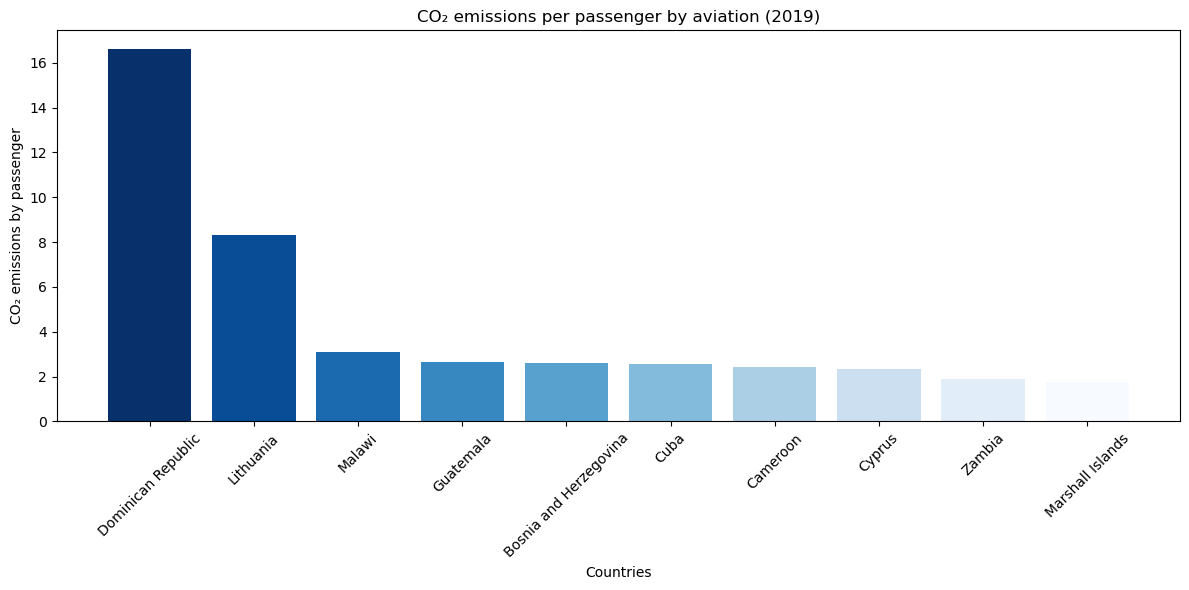

In [38]:
#Showing the top 10 countries with the worst score of CO2 emissions by passengers
merged_df_top_10 = merged_df.sort_values(by='co2_by_passenger', ascending=False).head(10)

# Plotting
plt.figure(figsize=(12, 6))

# Create a color gradient
colors = plt.cm.Blues(np.linspace(1, 0, len(merged_df_top_10)))

# Plot the bar chart
plt.bar(merged_df_top_10['country'], merged_df_top_10['co2_by_passenger'], color=colors)

# Add labels and title
plt.xlabel('Countries')
plt.ylabel('CO₂ emissions by passenger')
plt.title('CO₂ emissions per passenger by aviation (2019)')
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

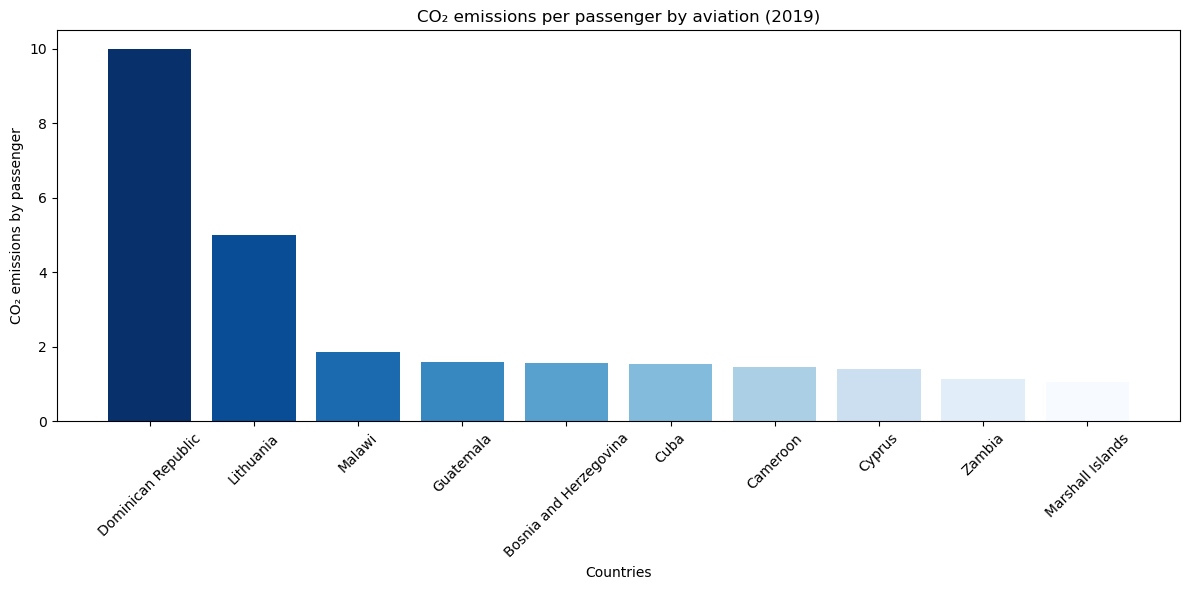

In [39]:
# Sort by the score in descending order and select the top 10
merged_df_top_10 = merged_df.sort_values(by='score', ascending=False).head(10)

# Plotting
plt.figure(figsize=(12, 6))

# Create a color gradient
colors = plt.cm.Blues(np.linspace(1, 0, len(merged_df_top_10)))

# Plot the bar chart
plt.bar(merged_df_top_10['country'], merged_df_top_10['score'], color=colors)

# Add labels and title
plt.xlabel('Countries')
plt.ylabel('CO₂ emissions by passenger')
plt.title('CO₂ emissions per passenger by aviation (2019)')
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()